# Olist Customer Segmentation Model

## Table of Contents

1. [CRISP-DM](#1-CRISP-DM)
2. [Data Preprocessing](#2-Data-Preprocessing)
3. [Exploratory Data Analysis](#3-Exploratory-Data-Analysis)
4. [Machine Learning Modelling](#4-Machine-Learning-Modelling)
5. [Result Evaluation + Interpretation](#5-Result-Evaluation-+-Interpretation)
6. [Members’ Contribution](#6-Members’-Contribution)

## 1 CRISP-DM

## 2 Data Pre-processing

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

In [2]:
# Create a list to store data file names
olist_data = ['customers', 'geolocation', 'order_items', 'order_payments', 'order_reviews', 'orders', \
              'product_category_name_translation', 'products', 'sellers']

# Create a dictionary to store data
olist = {}

# Read CSV file and put in dataframe in olist dictionary
for data in olist_data:
    olist[data] = pd.read_csv("./Olist Dataset/"+data+".csv")

# Display each dataframe
for data, df in olist.items():
    print(data)
    display(df.head())

customers


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


geolocation


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


order_items


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


order_payments


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


order_reviews


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


orders


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


product_category_name_translation


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


products


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


sellers


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Geolocation

In [297]:
#Abdul Jamak Customers & Geolocations
cust = pd.read_csv("./Olist Dataset/customers.csv")

#Mapping State to readable string
full_state = {'SP': 'Sao Paulo', 'SC':'Santa Catarina' ,'MG':'Minas Gerais', 'PR':'Parana','RJ':'Rio de Janeiro', 'RS':'Rio Grande do Sul', 'PA':'Para','GO':'Goias',
                'ES':'Espirito Santo','BA':'Bahia','MA':'Maranhao', 'MS':'MotoGrosso do Sul', 'CE':'Ceara','DF':'Distrito Federal','RN':'Rio Grande do Norte','PE':'Pernambuco',
                'MT':'MatoGrosso','AM':'Amazonas','AP':'Amapa','AL':'Alagoas','RO':'Rondonia','PB':'Paraiba','TO':'Tocantins','PI':'Piaui','AC':'Acre','SE':'Sergipe','RR':'Roraima'}


cust ['full_state'] = cust['customer_state'].map(full_state)
#customers.to_csv('customers_v1.csv', index=False)

#Duplicate customer_zip_code_prefix and rename to geolocation_zip_code_prefix
cust['geolocation_zip_code_prefix'] = cust.loc[:, 'customer_zip_code_prefix']

cust.shape


(99441, 7)

In [298]:
#Abdul Jamak Customers & Geolocations
#Geolocation Dataset: This dataset contains the Brazilian zip codes and the latitude/longitude coordinates present within the area represented by the zip-code.
geo = pd.read_csv("./Olist Dataset/geolocation.csv")

#Removing duplicated zip codes 
geo = geo.drop_duplicates(subset=['geolocation_zip_code_prefix'], keep='first')

#left join geolocations into customers and select relevant dataset
cust_geo=pd.merge(cust,geo, on='geolocation_zip_code_prefix', how='left')

cust_geo = cust_geo[['customer_id','customer_unique_id','customer_zip_code_prefix','customer_city','customer_state','full_state','geolocation_lat','geolocation_lng', 'geolocation_city']]

#cust_geo.shape

cust_geo.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,full_state,geolocation_lat,geolocation_lng,geolocation_city
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Sao Paulo,-20.509897,-47.397866,franca
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Sao Paulo,-23.726853,-46.545746,sao bernardo do campo
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Sao Paulo,-23.527788,-46.660310,sao paulo
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Sao Paulo,-23.496930,-46.185352,mogi das cruzes
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Sao Paulo,-22.987222,-47.151073,campinas


### Olist Products

In [299]:
#ZeLi Products
products=pd.read_csv("./Olist Dataset/products.csv")
products.head()

##Correct typo in field names
products = products.rename({"product_name_lenght":"product_name_length","product_description_lenght":"product_description_length"}, axis='columns')
products.head()

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [300]:
#Define a function to find missing values and calculate the percentage of missing values
def missing_value(data,num):
    null_data = data.isnull().sum().sort_values(ascending=False) # of null values counted and sorted in descending order
    percent_1 = data.isnull().sum()/data.isnull().count() #Calculation of the percentage of null values
    missing_data = pd.concat([null_data, percent_1.apply(lambda x: format(x, '.2%'))],
                             axis=1, keys=['total missing', 'missing percentage'])
    print('\nThe number and percentage of missing values in this table are as follows：\n',missing_data.head(num))

missing_value(products,9)


The number and percentage of missing values in this table are as follows：
                             total missing missing percentage
product_category_name                 610              1.85%
product_name_length                   610              1.85%
product_description_length            610              1.85%
product_photos_qty                    610              1.85%
product_weight_g                        2              0.01%
product_length_cm                       2              0.01%
product_height_cm                       2              0.01%
product_width_cm                        2              0.01%
product_id                              0              0.00%


In [301]:
#Product table with missing values
products['product_category_name'] = products['product_category_name'].fillna('U')
products['product_photos_qty'] = products.loc[:,'product_photos_qty'].fillna(products.loc[:,'product_photos_qty'].mean())
products['product_weight_g'] = products.loc[:,'product_weight_g'].fillna(products.loc[:,'product_weight_g'].mean())
products['product_length_cm'] = products.loc[:,'product_length_cm'].fillna(products.loc[:,'product_length_cm'].mean())
products['product_height_cm'] = products.loc[:,'product_height_cm'].fillna(products.loc[:,'product_height_cm'].mean())
products['product_width_cm'] = products.loc[:,'product_width_cm'].fillna(products.loc[:,'product_width_cm'].mean())

In [302]:
products.describe()

,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.720614,4281.908773,16.913945,13.637140,12.078681
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [303]:
products[products['product_weight_g']==0]

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
9769,81781c0fed9fe1ad6e8c81fca1e1cb08,cama_mesa_banho,51.0,529.0,1.0,0.0,30.0,25.0,30.0
13683,8038040ee2a71048d4bdbbdc985b69ab,cama_mesa_banho,48.0,528.0,1.0,0.0,30.0,25.0,30.0
14997,36ba42dd187055e1fbe943b2d11430ca,cama_mesa_banho,53.0,528.0,1.0,0.0,30.0,25.0,30.0
32079,e673e90efa65a5409ff4196c038bb5af,cama_mesa_banho,53.0,528.0,1.0,0.0,30.0,25.0,30.0


In [304]:
#Product table outlier replacement
products.loc[:,'product_weight_g'].replace(to_replace=0, value=products.loc[:,'product_weight_g'].mean(), inplace=True)
products.describe()

,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000
mean,48.476949,771.495285,2.188986,2276.748834,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.720614,4281.835302,16.913945,13.637140,12.078681
min,5.000000,4.000000,1.000000,2.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [305]:
#View the number of duplicate values in products
print("Number of duplicate values in products",products.duplicated().sum())

Number of duplicate values in products 0


In [306]:
#Import the dataset of “product_category_name_translation”
product_cate=pd.read_csv("./Olist Dataset/product_category_name_translation.csv")
product_cate.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [307]:
missing_value(product_cate,2)


The number and percentage of missing values in this table are as follows：
                                total missing missing percentage
product_category_name                      0              0.00%
product_category_name_english              0              0.00%


In [308]:
#Merge two tables
prdt=products.merge(product_cate,on='product_category_name',how='left')
prdt= prdt[['product_id','product_category_name','product_category_name_english','product_name_length','product_description_length','product_photos_qty','product_weight_g','product_length_cm', 'product_height_cm','product_width_cm']]
prdt.head()

,product_id,product_category_name,product_category_name_english,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [309]:
#Sales volume and total share of each product category
product_total=pd.DataFrame()
product_total=prdt['product_category_name_english'].value_counts()
product_totalDf=product_total.reset_index(drop=False)
product_totalDf['Percentage']=pd.Series(product_totalDf.loc[:,'product_category_name_english']/prdt.shape[0]).map(lambda x: format(x, '.2%'))
product_totalDf

,index,product_category_name_english,Percentage
0,bed_bath_table,3029,9.19%
1,sports_leisure,2867,8.70%
2,furniture_decor,2657,8.06%
3,health_beauty,2444,7.42%
4,housewares,2335,7.09%
...,...,...,...
66,tablets_printing_image,9,0.03%
67,fashion_childrens_clothes,5,0.02%
68,home_comfort_2,5,0.02%
69,security_and_services,2,0.01%


In [310]:
product_totalDf.head(10)

,index,product_category_name_english,Percentage
0,bed_bath_table,3029,9.19%
1,sports_leisure,2867,8.70%
2,furniture_decor,2657,8.06%
3,health_beauty,2444,7.42%
4,housewares,2335,7.09%
5,auto,1900,5.77%
6,computers_accessories,1639,4.97%
7,toys,1411,4.28%
8,watches_gifts,1329,4.03%
9,telephony,1134,3.44%


In [311]:
#Top 10 selling product categories as a percentage of total orders20745
t=pd.DataFrame()
t=product_totalDf.head(10)
Total_Percentage=str(round(t['product_category_name_english'].sum()/prdt.shape[0],2)*100)+'%'
print('Top 10 selling product categories as a percentage of total orders:',Total_Percentage)

Top 10 selling product categories as a percentage of total orders: 63.0%


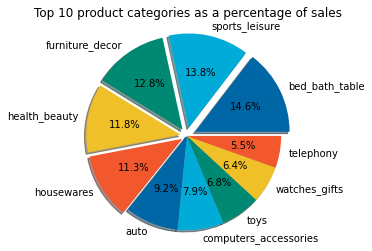

In [312]:
#This pie chart shows us the top ten selling products as a percentage of the total sales of these ten products
from matplotlib import pyplot as plt
plt.figure()
colors = ['#0067a6','#00abd8','#008972','#efc028','#f2572d']
plt.pie(product_totalDf['product_category_name_english'].head(10),
       explode=[0.1,0.09,0.08,0.07,0.06,0.0,0.0,0.0,0.0,0.0],
       autopct='%1.1f%%',
       colors = colors,
       labels = ['bed_bath_table','sports_leisure','furniture_decor','health_beauty','housewares','auto','computers_accessories','toys','watches_gifts','telephony'],      shadow=True,
       startangle=0,
       radius=1)
plt.axis('equal')
plt.title('Top 10 product categories as a percentage of sales')
#Display graphics
plt.show()

### Olist Sellers

In [313]:
#Hilary Sellers Info
#Sellers Dataset
sellers = pd.read_csv("./Olist Dataset/sellers.csv")
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [314]:
#Order_Items Dataset
order_items = pd.read_csv("./Olist Dataset/order_items.csv")
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [315]:
#Check for duplicate values
print("Number of duplicated values in seller_id",sellers.duplicated().sum())
print("Number of duplicated values in seller_id",order_items.duplicated().sum())

Number of duplicated values in seller_id 0
Number of duplicated values in seller_id 0


**Note: To ensure the seller is unique and the data is at sellers level, do aggregation before merging order and seller**

In [316]:
#To merge Seller table with order_items table
seller_order_items=pd.merge(sellers,order_items, on='seller_id', how='left')
seller_order_items.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,4a90af3e85dd563884e2afeab1091394,1,ffb64e34a37740dafb6c88f1abd1fa61,2017-08-25 20:50:19,106.20,9.56
1,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,6d953888a914b67350d5bc4d48f2acab,1,f4621f8ad6f54a2e3c408884068be46d,2017-05-11 16:25:11,101.70,15.92
2,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,bc8a5de6abf5b14f98a6135a7fb46731,2,325a06bcce0da45b7f4ecf2797dd40e4,2017-09-05 12:50:19,10.80,2.42
3,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,035201c3c82a97f8a25dd6bd5244b2d5,1,1c36a5285f7f3b1ed2637d7c528ce5ff,2017-11-22 04:30:29,89.99,45.09
4,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,0504447548229e075dea8441b37b1e2a,1,8852eb03b04ec3268a66e9b696e25f6f,2017-10-06 02:14:42,199.90,21.89


In [317]:
#To merge geolocation table with seller_order_items table

#Duplicate customer_zip_code_prefix and rename to geolocation_zip_code_prefix
seller_order_items['geolocation_zip_code_prefix'] = seller_order_items.loc[:, 'seller_zip_code_prefix']

#Merge geolocation into seller_order_items table
seller_order_geo=pd.merge(seller_order_items,geo, on='geolocation_zip_code_prefix', how='left')
seller_order_geo.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,4a90af3e85dd563884e2afeab1091394,1,ffb64e34a37740dafb6c88f1abd1fa61,2017-08-25 20:50:19,106.20,9.56,13023,-22.898536,-47.063125,campinas,SP
1,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,6d953888a914b67350d5bc4d48f2acab,1,f4621f8ad6f54a2e3c408884068be46d,2017-05-11 16:25:11,101.70,15.92,13023,-22.898536,-47.063125,campinas,SP
2,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,bc8a5de6abf5b14f98a6135a7fb46731,2,325a06bcce0da45b7f4ecf2797dd40e4,2017-09-05 12:50:19,10.80,2.42,13023,-22.898536,-47.063125,campinas,SP
3,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,035201c3c82a97f8a25dd6bd5244b2d5,1,1c36a5285f7f3b1ed2637d7c528ce5ff,2017-11-22 04:30:29,89.99,45.09,13844,-22.382941,-46.946641,mogi-guacu,SP
4,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,0504447548229e075dea8441b37b1e2a,1,8852eb03b04ec3268a66e9b696e25f6f,2017-10-06 02:14:42,199.90,21.89,13844,-22.382941,-46.946641,mogi-guacu,SP


### Olist Orders

In [3]:
# extract data for orders
for data, df in olist.items():
    if data == 'orders':
        order_df = df
    elif data == 'order_payments':
        order_payment_df = df
    elif data == 'order_items':
        order_items_df = df

display(order_df.head())
display(order_payment_df.head())
display(order_items_df.head())

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
# check dimension
print("order_df:", order_df.shape)
print("order_payment_df:", order_payment_df.shape)
print("order_items_df:", order_items_df.shape)

order_df: (99441, 8)
order_payment_df: (103886, 5)
order_items_df: (112650, 7)


#### Orders

In [6]:
# check missing values in orders
missing_value(order_df, 8)


The number and percentage of missing values in this table are as follows：
                                total missing missing percentage
order_delivered_customer_date           2965              2.98%
order_delivered_carrier_date            1783              1.79%
order_approved_at                        160              0.16%
order_id                                   0              0.00%
customer_id                                0              0.00%
order_status                               0              0.00%
order_purchase_timestamp                   0              0.00%
order_estimated_delivery_date              0              0.00%


In [7]:
# check whether the order id is unique in orders
print("Unique order count:", len(pd.unique(order_df['order_id'])))
print("Total order count:", len(order_df.index))

Unique order count: 99441
Total order count: 99441


In [8]:
# fill missing value with 0
order_df.fillna(0, inplace = True)

# check missing values in orders
missing_value(order_df, 8)


The number and percentage of missing values in this table are as follows：
                                total missing missing percentage
order_id                                   0              0.00%
customer_id                                0              0.00%
order_status                               0              0.00%
order_purchase_timestamp                   0              0.00%
order_approved_at                          0              0.00%
order_delivered_carrier_date               0              0.00%
order_delivered_customer_date              0              0.00%
order_estimated_delivery_date              0              0.00%


#### Order Payment

In [9]:
# check missing values in order payment
missing_value(order_payment_df, 5)


The number and percentage of missing values in this table are as follows：
                       total missing missing percentage
order_id                          0              0.00%
payment_sequential                0              0.00%
payment_type                      0              0.00%
payment_installments              0              0.00%
payment_value                     0              0.00%


In [10]:
# check whether the order id is unique in order payment
print("Unique order count:", len(pd.unique(order_payment_df['order_id'])))
print("Total order count:", len(order_payment_df.index))

Unique order count: 99440
Total order count: 103886


In [11]:
# check those record with duplicates order id in order payment
order_payment_df[order_payment_df.duplicated(['order_id'], keep=False)].sort_values(["order_id", "payment_sequential"], ascending = [True, True])

,order_id,payment_sequential,payment_type,payment_installments,payment_value
89575,0016dfedd97fc2950e388d2971d718c7,1,credit_card,5,52.63
80856,0016dfedd97fc2950e388d2971d718c7,2,voucher,1,17.92
20036,002f19a65a2ddd70a090297872e6d64e,1,voucher,1,44.11
98894,002f19a65a2ddd70a090297872e6d64e,2,voucher,1,33.18
10244,0071ee2429bc1efdc43aa3e073a5290e,1,voucher,1,100.00
...,...,...,...,...,...
21648,ffa1dd97810de91a03abd7bd76d2fed1,2,voucher,1,418.73
32912,ffa39020fe7c8a3e907320e1bec4b985,1,credit_card,1,7.13
3009,ffa39020fe7c8a3e907320e1bec4b985,2,voucher,1,64.01
75188,ffc730a0615d28ec19f9cad02cb41442,1,credit_card,1,14.76


In [12]:
# pivot payment installments by payment type
installment_df = order_payment_df[['order_id', 'payment_type', 'payment_installments']].copy()
installment_df = pd.pivot_table(installment_df, index='order_id', columns='payment_type', aggfunc= {'payment_installments': 'sum'})
installment_df.fillna(0, inplace = True)
display(installment_df.head())

# check the order payment row count
print("Total order count:", len(installment_df.index))

payment_installments                         \
payment_type                                   boleto credit_card debit_card   
order_id                                                                       
00010242fe8c5a6d1ba2dd792cb16214                  0.0         2.0        0.0   
00018f77f2f0320c557190d7a144bdd3                  0.0         3.0        0.0   
000229ec398224ef6ca0657da4fc703e                  0.0         5.0        0.0   
00024acbcdf0a6daa1e931b038114c75                  0.0         2.0        0.0   
00042b26cf59d7ce69dfabb4e55b4fd9                  0.0         3.0        0.0   

                                                      
payment_type                     not_defined voucher  
order_id                                              
00010242fe8c5a6d1ba2dd792cb16214         0.0     0.0  
00018f77f2f0320c557190d7a144bdd3         0.0     0.0  
000229ec398224ef6ca0657da4fc703e         0.0     0.0  
00024acbcdf0a6daa1e931b038114c75         0.0     0.0  
00042b26cf59d7ce69dfabb4e55b4fd9         0.0     0.0

Total order count: 99440


In [13]:
# check columns of the pivot table (payment installments by payment type)
print(installment_df.columns)

MultiIndex([('payment_installments',      'boleto'),
            ('payment_installments', 'credit_card'),
            ('payment_installments',  'debit_card'),
            ('payment_installments', 'not_defined'),
            ('payment_installments',     'voucher')],
           names=[None, 'payment_type'])


In [14]:
# pivot payment values by payment type
payment_value_df = order_payment_df[['order_id', 'payment_type', 'payment_value']].copy()
payment_value_df = pd.pivot_table(payment_value_df, index='order_id', columns='payment_type', aggfunc= {'payment_value': 'sum'})
payment_value_df.fillna(0, inplace = True)
display(payment_value_df.head())

# check the order id count
print("Total order count:", len(payment_value_df.index))

payment_value                         \
payment_type                            boleto credit_card debit_card   
order_id                                                                
00010242fe8c5a6d1ba2dd792cb16214           0.0       72.19        0.0   
00018f77f2f0320c557190d7a144bdd3           0.0      259.83        0.0   
000229ec398224ef6ca0657da4fc703e           0.0      216.87        0.0   
00024acbcdf0a6daa1e931b038114c75           0.0       25.78        0.0   
00042b26cf59d7ce69dfabb4e55b4fd9           0.0      218.04        0.0   

                                                      
payment_type                     not_defined voucher  
order_id                                              
00010242fe8c5a6d1ba2dd792cb16214         0.0     0.0  
00018f77f2f0320c557190d7a144bdd3         0.0     0.0  
000229ec398224ef6ca0657da4fc703e         0.0     0.0  
00024acbcdf0a6daa1e931b038114c75         0.0     0.0  
00042b26cf59d7ce69dfabb4e55b4fd9         0.0     0.0

Total order count: 99440


In [15]:
# merge installment and payment value
order_payment_df = installment_df.join(payment_value_df)
display(order_payment_df.head())

payment_installments                         \
payment_type                                   boleto credit_card debit_card   
order_id                                                                       
00010242fe8c5a6d1ba2dd792cb16214                  0.0         2.0        0.0   
00018f77f2f0320c557190d7a144bdd3                  0.0         3.0        0.0   
000229ec398224ef6ca0657da4fc703e                  0.0         5.0        0.0   
00024acbcdf0a6daa1e931b038114c75                  0.0         2.0        0.0   
00042b26cf59d7ce69dfabb4e55b4fd9                  0.0         3.0        0.0   

                                                     payment_value  \
payment_type                     not_defined voucher        boleto   
order_id                                                             
00010242fe8c5a6d1ba2dd792cb16214         0.0     0.0           0.0   
00018f77f2f0320c557190d7a144bdd3         0.0     0.0           0.0   
000229ec398224ef6ca0657da4fc703e         0.0     0.0           0.0   
00024acbcdf0a6daa1e931b038114c75         0.0     0.0           0.0   
00042b26cf59d7ce69dfabb4e55b4fd9         0.0     0.0           0.0   

                                                                             
payment_type                     credit_card debit_card not_defined voucher  
order_id                                                                     
00010242fe8c5a6d1ba2dd792cb16214       72.19        0.0         0.0     0.0  
00018f77f2f0320c557190d7a144bdd3      259.83        0.0         0.0     0.0  
000229ec398224ef6ca0657da4fc703e      216.87        0.0         0.0     0.0  
00024acbcdf0a6daa1e931b038114c75       25.78        0.0         0.0     0.0  
00042b26cf59d7ce69dfabb4e55b4fd9      218.04        0.0         0.0     0.0

In [16]:
# flattened order_payment_df
order_payment_df.columns = order_payment_df.columns.to_series().str.join('_')

# check columns after merged
print(order_payment_df.columns)

display(order_payment_df.head())

Index(['payment_installments_boleto', 'payment_installments_credit_card',
       'payment_installments_debit_card', 'payment_installments_not_defined',
       'payment_installments_voucher', 'payment_value_boleto',
       'payment_value_credit_card', 'payment_value_debit_card',
       'payment_value_not_defined', 'payment_value_voucher'],
      dtype='object')


,payment_installments_boleto,payment_installments_credit_card,payment_installments_debit_card,payment_installments_not_defined,payment_installments_voucher,payment_value_boleto,payment_value_credit_card,payment_value_debit_card,payment_value_not_defined,payment_value_voucher
order_id,,,,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,0.0,2.0,0.0,0.0,0.0,0.0,72.19,0.0,0.0,0.0
00018f77f2f0320c557190d7a144bdd3,0.0,3.0,0.0,0.0,0.0,0.0,259.83,0.0,0.0,0.0
000229ec398224ef6ca0657da4fc703e,0.0,5.0,0.0,0.0,0.0,0.0,216.87,0.0,0.0,0.0
00024acbcdf0a6daa1e931b038114c75,0.0,2.0,0.0,0.0,0.0,0.0,25.78,0.0,0.0,0.0
00042b26cf59d7ce69dfabb4e55b4fd9,0.0,3.0,0.0,0.0,0.0,0.0,218.04,0.0,0.0,0.0


In [17]:
# add attribute to indicate whether the payment method is used in this order
order_payment_df['payment_boleto'] = order_payment_df['payment_installments_boleto'] > 0
order_payment_df['payment_credit_card'] = order_payment_df['payment_installments_credit_card'] > 0
order_payment_df['payment_debit_card'] = order_payment_df['payment_installments_debit_card'] > 0
order_payment_df['payment_not_defined'] = order_payment_df['payment_installments_not_defined'] > 0
order_payment_df['payment_voucher'] = order_payment_df['payment_installments_voucher'] > 0

display(order_payment_df.head())

,payment_installments_boleto,payment_installments_credit_card,payment_installments_debit_card,payment_installments_not_defined,payment_installments_voucher,payment_value_boleto,payment_value_credit_card,payment_value_debit_card,payment_value_not_defined,payment_value_voucher,payment_boleto,payment_credit_card,payment_debit_card,payment_not_defined,payment_voucher
order_id,,,,,,,,,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,0.0,2.0,0.0,0.0,0.0,0.0,72.19,0.0,0.0,0.0,False,True,False,False,False
00018f77f2f0320c557190d7a144bdd3,0.0,3.0,0.0,0.0,0.0,0.0,259.83,0.0,0.0,0.0,False,True,False,False,False
000229ec398224ef6ca0657da4fc703e,0.0,5.0,0.0,0.0,0.0,0.0,216.87,0.0,0.0,0.0,False,True,False,False,False
00024acbcdf0a6daa1e931b038114c75,0.0,2.0,0.0,0.0,0.0,0.0,25.78,0.0,0.0,0.0,False,True,False,False,False
00042b26cf59d7ce69dfabb4e55b4fd9,0.0,3.0,0.0,0.0,0.0,0.0,218.04,0.0,0.0,0.0,False,True,False,False,False


In [18]:
for data, df in olist.items():
    if data == 'order_payments':
        first_order_payment_df = df

# first payent method used for installments
first_order_payment_df = first_order_payment_df[first_order_payment_df['payment_sequential'] == 1]
first_order_payment_df.set_index('order_id', inplace = True)
first_order_payment_df = first_order_payment_df.drop(['payment_sequential', 'payment_installments', 'payment_value'], axis=1)

first_order_payment_df.rename(columns = {'payment_type':'first_payment_installment'}, inplace = True)
display(first_order_payment_df.head())

,first_payment_installment
order_id,
b81ef226f3fe1789b1e8b2acac839d17,credit_card
a9810da82917af2d9aefd1278f1dcfa0,credit_card
25e8ea4e93396b6fa0d3dd708e76c1bd,credit_card
ba78997921bbcdc1373bb41e913ab953,credit_card
42fdf880ba16b47b59251dd489d4441a,credit_card


In [19]:
# merge back to the order payment df
order_payment_df = order_payment_df.join(first_order_payment_df)
display(order_payment_df.head())

,payment_installments_boleto,payment_installments_credit_card,payment_installments_debit_card,payment_installments_not_defined,payment_installments_voucher,payment_value_boleto,payment_value_credit_card,payment_value_debit_card,payment_value_not_defined,payment_value_voucher,payment_boleto,payment_credit_card,payment_debit_card,payment_not_defined,payment_voucher,first_payment_installment
order_id,,,,,,,,,,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,0.0,2.0,0.0,0.0,0.0,0.0,72.19,0.0,0.0,0.0,False,True,False,False,False,credit_card
00018f77f2f0320c557190d7a144bdd3,0.0,3.0,0.0,0.0,0.0,0.0,259.83,0.0,0.0,0.0,False,True,False,False,False,credit_card
000229ec398224ef6ca0657da4fc703e,0.0,5.0,0.0,0.0,0.0,0.0,216.87,0.0,0.0,0.0,False,True,False,False,False,credit_card
00024acbcdf0a6daa1e931b038114c75,0.0,2.0,0.0,0.0,0.0,0.0,25.78,0.0,0.0,0.0,False,True,False,False,False,credit_card
00042b26cf59d7ce69dfabb4e55b4fd9,0.0,3.0,0.0,0.0,0.0,0.0,218.04,0.0,0.0,0.0,False,True,False,False,False,credit_card


In [20]:
payment_method_list = ['payment_boleto', 'payment_credit_card', 'payment_debit_card', 'payment_not_defined', 'payment_voucher']
payment_installments_list = ['payment_installments_boleto', 'payment_installments_credit_card', 'payment_installments_debit_card', 'payment_installments_not_defined', 'payment_installments_voucher']

# add number of distinct payment method used
order_payment_df['no_payment_type'] = order_payment_df[payment_method_list].sum(axis = 1)

# add total installments
order_payment_df['total_installments'] = order_payment_df[payment_installments_list].sum(axis = 1)

display(order_payment_df)

,payment_installments_boleto,payment_installments_credit_card,payment_installments_debit_card,payment_installments_not_defined,payment_installments_voucher,payment_value_boleto,payment_value_credit_card,payment_value_debit_card,payment_value_not_defined,payment_value_voucher,payment_boleto,payment_credit_card,payment_debit_card,payment_not_defined,payment_voucher,first_payment_installment,no_payment_type,total_installments
order_id,,,,,,,,,,,,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,0.0,2.0,0.0,0.0,0.0,0.00,72.19,0.0,0.0,0.0,False,True,False,False,False,credit_card,1,2.0
00018f77f2f0320c557190d7a144bdd3,0.0,3.0,0.0,0.0,0.0,0.00,259.83,0.0,0.0,0.0,False,True,False,False,False,credit_card,1,3.0
000229ec398224ef6ca0657da4fc703e,0.0,5.0,0.0,0.0,0.0,0.00,216.87,0.0,0.0,0.0,False,True,False,False,False,credit_card,1,5.0
00024acbcdf0a6daa1e931b038114c75,0.0,2.0,0.0,0.0,0.0,0.00,25.78,0.0,0.0,0.0,False,True,False,False,False,credit_card,1,2.0
00042b26cf59d7ce69dfabb4e55b4fd9,0.0,3.0,0.0,0.0,0.0,0.00,218.04,0.0,0.0,0.0,False,True,False,False,False,credit_card,1,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffc94f6ce00a00581880bf54a75a037,1.0,0.0,0.0,0.0,0.0,343.40,0.00,0.0,0.0,0.0,True,False,False,False,False,boleto,1,1.0
fffcd46ef2263f404302a634eb57f7eb,1.0,0.0,0.0,0.0,0.0,386.53,0.00,0.0,0.0,0.0,True,False,False,False,False,boleto,1,1.0
fffce4705a9662cd70adb13d4a31832d,0.0,3.0,0.0,0.0,0.0,0.00,116.85,0.0,0.0,0.0,False,True,False,False,False,credit_card,1,3.0


In [21]:
payment_value_list = ['payment_value_boleto', 'payment_value_credit_card', 'payment_value_debit_card', 'payment_value_not_defined', 'payment_value_voucher']

# most used payment type
order_payment_df['most_used_payment_type'] = order_payment_df[payment_installments_list].idxmax(axis=1)
order_payment_df['most_used_payment_type'] = order_payment_df['most_used_payment_type'].replace("payment_installments_", "", regex=True)

# most paid payment type
order_payment_df['most_paid_payment_type'] = order_payment_df[payment_value_list].idxmax(axis=1)
order_payment_df['most_paid_payment_type'] = order_payment_df['most_paid_payment_type'].replace("payment_value_", "", regex=True)

# replace _ with empty space
order_payment_df = order_payment_df.replace("_", " ", regex=True)

# display order
display(order_payment_df)

,payment_installments_boleto,payment_installments_credit_card,payment_installments_debit_card,payment_installments_not_defined,payment_installments_voucher,payment_value_boleto,payment_value_credit_card,payment_value_debit_card,payment_value_not_defined,payment_value_voucher,payment_boleto,payment_credit_card,payment_debit_card,payment_not_defined,payment_voucher,first_payment_installment,no_payment_type,total_installments,most_used_payment_type,most_paid_payment_type
order_id,,,,,,,,,,,,,,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,0.0,2.0,0.0,0.0,0.0,0.00,72.19,0.0,0.0,0.0,False,True,False,False,False,credit card,1,2.0,credit card,credit card
00018f77f2f0320c557190d7a144bdd3,0.0,3.0,0.0,0.0,0.0,0.00,259.83,0.0,0.0,0.0,False,True,False,False,False,credit card,1,3.0,credit card,credit card
000229ec398224ef6ca0657da4fc703e,0.0,5.0,0.0,0.0,0.0,0.00,216.87,0.0,0.0,0.0,False,True,False,False,False,credit card,1,5.0,credit card,credit card
00024acbcdf0a6daa1e931b038114c75,0.0,2.0,0.0,0.0,0.0,0.00,25.78,0.0,0.0,0.0,False,True,False,False,False,credit card,1,2.0,credit card,credit card
00042b26cf59d7ce69dfabb4e55b4fd9,0.0,3.0,0.0,0.0,0.0,0.00,218.04,0.0,0.0,0.0,False,True,False,False,False,credit card,1,3.0,credit card,credit card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffc94f6ce00a00581880bf54a75a037,1.0,0.0,0.0,0.0,0.0,343.40,0.00,0.0,0.0,0.0,True,False,False,False,False,boleto,1,1.0,boleto,boleto
fffcd46ef2263f404302a634eb57f7eb,1.0,0.0,0.0,0.0,0.0,386.53,0.00,0.0,0.0,0.0,True,False,False,False,False,boleto,1,1.0,boleto,boleto
fffce4705a9662cd70adb13d4a31832d,0.0,3.0,0.0,0.0,0.0,0.00,116.85,0.0,0.0,0.0,False,True,False,False,False,credit card,1,3.0,credit card,credit card


#### Order Items

In [23]:
# check missing values in order items
missing_value(order_items_df, 7)


The number and percentage of missing values in this table are as follows：
                      total missing missing percentage
order_id                         0              0.00%
order_item_id                    0              0.00%
product_id                       0              0.00%
seller_id                        0              0.00%
shipping_limit_date              0              0.00%
price                            0              0.00%
freight_value                    0              0.00%


In [24]:
# check whether each order id only one shipping limit date
order_shipping_limit_df = order_items_df[['order_id', 'shipping_limit_date']].copy()
order_shipping_limit_df.drop_duplicates()

# check whether the order id is unique in order shipping limit
print("Unique order count:", len(pd.unique(order_shipping_limit_df['order_id'])))
print("Total order count:", len(order_shipping_limit_df.index))

Unique order count: 98666
Total order count: 112650


In [25]:
# pivot with multiple aggregations
order_items_agg_df = order_items_df[['order_id', 'product_id', 'seller_id', 'price', 'freight_value']].copy()
order_items_agg_df = order_items_agg_df.groupby('order_id').aggregate({'product_id': ['count', 'nunique'], 'seller_id': 'nunique', 'price': 'sum', 'freight_value': 'sum'})
display(order_items_agg_df.head())

# check the order id count
print("Total order count:", len(order_items_agg_df.index))

product_id         seller_id   price  \
                                      count nunique   nunique     sum   
order_id                                                                
00010242fe8c5a6d1ba2dd792cb16214          1       1         1   58.90   
00018f77f2f0320c557190d7a144bdd3          1       1         1  239.90   
000229ec398224ef6ca0657da4fc703e          1       1         1  199.00   
00024acbcdf0a6daa1e931b038114c75          1       1         1   12.99   
00042b26cf59d7ce69dfabb4e55b4fd9          1       1         1  199.90   

                                 freight_value  
                                           sum  
order_id                                        
00010242fe8c5a6d1ba2dd792cb16214         13.29  
00018f77f2f0320c557190d7a144bdd3         19.93  
000229ec398224ef6ca0657da4fc703e         17.87  
00024acbcdf0a6daa1e931b038114c75         12.79  
00042b26cf59d7ce69dfabb4e55b4fd9         18.14

Total order count: 98666


In [26]:
# flattened order_items_agg_df
order_items_agg_df.columns = order_items_agg_df.columns.to_series().str.join('_')

# check columns after merged
print(order_items_agg_df.columns)

display(order_items_agg_df.head())

Index(['product_id_count', 'product_id_nunique', 'seller_id_nunique',
       'price_sum', 'freight_value_sum'],
      dtype='object')


,product_id_count,product_id_nunique,seller_id_nunique,price_sum,freight_value_sum
order_id,,,,,
00010242fe8c5a6d1ba2dd792cb16214,1,1,1,58.90,13.29
00018f77f2f0320c557190d7a144bdd3,1,1,1,239.90,19.93
000229ec398224ef6ca0657da4fc703e,1,1,1,199.00,17.87
00024acbcdf0a6daa1e931b038114c75,1,1,1,12.99,12.79
00042b26cf59d7ce69dfabb4e55b4fd9,1,1,1,199.90,18.14


In [27]:
# rename columns in order_items_agg_df
order_items_agg_df.rename(columns = {'product_id_count':'no_products','product_id_nunique':'no_unique_products', 'seller_id_nunique':'no_sellers_dealt', 'price_sum':'total_price', 'freight_value_sum':'total_freight_value'}, inplace = True)

display(order_items_agg_df.head())

,no_products,no_unique_products,no_sellers_dealt,total_price,total_freight_value
order_id,,,,,
00010242fe8c5a6d1ba2dd792cb16214,1,1,1,58.90,13.29
00018f77f2f0320c557190d7a144bdd3,1,1,1,239.90,19.93
000229ec398224ef6ca0657da4fc703e,1,1,1,199.00,17.87
00024acbcdf0a6daa1e931b038114c75,1,1,1,12.99,12.79
00042b26cf59d7ce69dfabb4e55b4fd9,1,1,1,199.90,18.14


#### Orders (Master Table)

In [28]:
# merge order_payment_df and order_items_agg_df
orders_master_df = order_payment_df.join(order_items_agg_df)

# set index in order_df
order_df.set_index("order_id", inplace = True)

# merge with order_df
orders_master_df = order_df.join(orders_master_df)

display(orders_master_df)

,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_installments_boleto,payment_installments_credit_card,payment_installments_debit_card,...,first_payment_installment,no_payment_type,total_installments,most_used_payment_type,most_paid_payment_type,no_products,no_unique_products,no_sellers_dealt,total_price,total_freight_value
order_id,,,,,,,,,,,,,,,,,,,,,
e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,0.0,1.0,0.0,...,credit card,2.0,3.0,voucher,voucher,1.0,1.0,1.0,29.99,8.72
53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,0.0,0.0,...,boleto,1.0,1.0,boleto,boleto,1.0,1.0,1.0,118.70,22.76
47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,0.0,3.0,0.0,...,credit card,1.0,3.0,credit card,credit card,1.0,1.0,1.0,159.90,19.22
949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,0.0,1.0,0.0,...,credit card,1.0,1.0,credit card,credit card,1.0,1.0,1.0,45.00,27.20
ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,0.0,1.0,0.0,...,credit card,1.0,1.0,credit card,credit card,1.0,1.0,1.0,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,0.0,3.0,0.0,...,credit card,1.0,3.0,credit card,credit card,1.0,1.0,1.0,72.00,13.08
63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,0.0,3.0,0.0,...,credit card,1.0,3.0,credit card,credit card,1.0,1.0,1.0,174.90,20.10
83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,0.0,5.0,0.0,...,credit card,1.0,5.0,credit card,credit card,1.0,1.0,1.0,205.99,65.02


In [30]:
# check record with any NAs
orders_master_df[orders_master_df.isnull().any(axis=1)]

,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_installments_boleto,payment_installments_credit_card,payment_installments_debit_card,...,first_payment_installment,no_payment_type,total_installments,most_used_payment_type,most_paid_payment_type,no_products,no_unique_products,no_sellers_dealt,total_price,total_freight_value
order_id,,,,,,,,,,,,,,,,,,,,,
8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,0,0,2017-12-05 00:00:00,0.0,5.0,0.0,...,credit card,1.0,5.0,credit card,credit card,NaN,NaN,NaN,NaN,NaN
c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,0,0,2018-02-16 00:00:00,0.0,1.0,0.0,...,credit card,1.0,1.0,credit card,credit card,NaN,NaN,NaN,NaN,NaN
37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,0,0,2017-09-05 00:00:00,1.0,0.0,0.0,...,boleto,1.0,1.0,boleto,boleto,NaN,NaN,NaN,NaN,NaN
d57e15fb07fd180f06ab3926b39edcd2,470b93b3f1cde85550fc74cd3a476c78,unavailable,2018-01-08 19:39:03,2018-01-09 07:26:08,0,0,2018-02-06 00:00:00,1.0,0.0,0.0,...,boleto,1.0,1.0,boleto,boleto,NaN,NaN,NaN,NaN,NaN
00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,0,0,0,2018-09-12 00:00:00,0.0,0.0,0.0,...,not defined,1.0,1.0,not defined,boleto,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
aaab15da689073f8f9aa978a390a69d1,df20748206e4b865b2f14a5eabbfcf34,unavailable,2018-01-16 14:27:59,2018-01-17 03:37:34,0,0,2018-02-06 00:00:00,1.0,0.0,0.0,...,boleto,1.0,1.0,boleto,boleto,NaN,NaN,NaN,NaN,NaN
3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,0,0,0,2018-10-01 00:00:00,0.0,0.0,0.0,...,voucher,1.0,1.0,voucher,voucher,NaN,NaN,NaN,NaN,NaN
a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,0,0,0,2018-09-27 00:00:00,0.0,0.0,0.0,...,voucher,1.0,1.0,voucher,voucher,NaN,NaN,NaN,NaN,NaN


In [31]:
# fill na with 0
orders_master_df.fillna(0, inplace = True)

In [33]:
display(orders_master_df.head())

,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_installments_boleto,payment_installments_credit_card,payment_installments_debit_card,...,first_payment_installment,no_payment_type,total_installments,most_used_payment_type,most_paid_payment_type,no_products,no_unique_products,no_sellers_dealt,total_price,total_freight_value
order_id,,,,,,,,,,,,,,,,,,,,,
e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,0.0,1.0,0.0,...,credit card,2.0,3.0,voucher,voucher,1.0,1.0,1.0,29.99,8.72
53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,0.0,0.0,...,boleto,1.0,1.0,boleto,boleto,1.0,1.0,1.0,118.70,22.76
47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,0.0,3.0,0.0,...,credit card,1.0,3.0,credit card,credit card,1.0,1.0,1.0,159.90,19.22
949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,0.0,1.0,0.0,...,credit card,1.0,1.0,credit card,credit card,1.0,1.0,1.0,45.00,27.20
ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,0.0,1.0,0.0,...,credit card,1.0,1.0,credit card,credit card,1.0,1.0,1.0,19.90,8.72


In [36]:
# convert some columns to integer
orders_master_df[['payment_installments_boleto', 'payment_installments_credit_card', 'payment_installments_debit_card', 'payment_installments_not_defined', 'payment_installments_voucher', 'no_payment_type', 'total_installments', 'no_products', 'no_unique_products', 'no_sellers_dealt']] = \
orders_master_df[['payment_installments_boleto', 'payment_installments_credit_card', 'payment_installments_debit_card', 'payment_installments_not_defined', 'payment_installments_voucher', 'no_payment_type', 'total_installments', 'no_products', 'no_unique_products', 'no_sellers_dealt']].astype(int)

display(orders_master_df)

,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_installments_boleto,payment_installments_credit_card,payment_installments_debit_card,...,first_payment_installment,no_payment_type,total_installments,most_used_payment_type,most_paid_payment_type,no_products,no_unique_products,no_sellers_dealt,total_price,total_freight_value
order_id,,,,,,,,,,,,,,,,,,,,,
e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,0,1,0,...,credit card,2,3,voucher,voucher,1,1,1,29.99,8.72
53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,0,0,...,boleto,1,1,boleto,boleto,1,1,1,118.70,22.76
47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,0,3,0,...,credit card,1,3,credit card,credit card,1,1,1,159.90,19.22
949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,0,1,0,...,credit card,1,1,credit card,credit card,1,1,1,45.00,27.20
ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,0,1,0,...,credit card,1,1,credit card,credit card,1,1,1,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,0,3,0,...,credit card,1,3,credit card,credit card,1,1,1,72.00,13.08
63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,0,3,0,...,credit card,1,3,credit card,credit card,1,1,1,174.90,20.10
83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,0,5,0,...,credit card,1,5,credit card,credit card,1,1,1,205.99,65.02


### Customer & Time Analysis  
#### by: Jamak

In [325]:
#A Jamak, Timestamp & Order Analysis
do = order_df
did = order_items_df
do.shape
did.head()
#len(pd.unique(do['order_id']))

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [326]:
#left join order_df into order_items_df and select relevant dataset
order_ans=pd.merge(did,do, on='order_id', how='left')
order_ans.head()

order_last = order_ans[['order_id', 'customer_id' ,'order_purchase_timestamp']]
order_last = order_last.sort_values(by="order_purchase_timestamp", ascending = False).drop_duplicates(subset=["customer_id"], keep="last")
order_last.head()



,order_id,customer_id,order_purchase_timestamp
37073,54282e97f61c23b78330c15b154c867d,4b7decb9b58e2569548b8b4c8e20e8d7,2018-09-03 09:06:57
23530,35a972d7f8436f405b56e36add1a7140,898b7fee99c4e42170ab69ba59be0a8b,2018-08-29 15:00:37
1722,03ef5dedbe7492bdae72eec50764c43f,496630b6740bcca28fce9ba50d8a26ef,2018-08-29 14:52:00
9829,168626408cb32af0ffaf76711caae1dc,6e353700bc7bcdf6ebc15d6de16d7002,2018-08-29 14:18:28
4925,0b223d92c27432930dfe407c6aea3041,e60df9449653a95af4549bbfcb18a6eb,2018-08-29 14:18:23


In [327]:
mo = order_ans[['order_id', 'customer_id' , 'order_item_id','order_purchase_timestamp']]
mo['order_purchase_timestamp'] = pd.to_datetime(mo['order_purchase_timestamp']).dt.date
#mo.shape
mths_3 = pd.date_range(end = mo.order_purchase_timestamp.iat[-1], freq=pd.offsets.MonthBegin(3),periods=2)
mths_6 = pd.date_range(end = mo.order_purchase_timestamp.iat[-1], freq=pd.offsets.MonthBegin(6),periods=2)


C:\Users\ANALYS~1\AppData\Local\Temp/ipykernel_11280/3614652057.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mo['order_purchase_timestamp'] = pd.to_datetime(mo['order_purchase_timestamp']).dt.date


In [328]:
mth3 = (mo.set_index("order_purchase_timestamp")
         #filter for last three months
        .loc[mths_3]
        .groupby(["customer_id"])
        .agg(sum_order_last_3_months=("order_item_id","sum"))
        )

mth6 = (mo.set_index("order_purchase_timestamp")
         #filter for last six months
        .loc[mths_6]
        .groupby(["customer_id"])
        .agg(sum_order_last_6_months=("order_item_id","sum"))
        )


In [329]:
trend = pd.concat([mth3,mth6],axis=1)
trend.shape

(733, 2)

In [330]:
#Find average monthly product and value purchase
monthly = order_ans[['order_id', 'customer_id' , 'order_item_id','order_purchase_timestamp','price']]
# monthly.groupby(pd.PeriodIndex(monthly['order_purchase_timestamp'], freq="M"))['price'].mean()

monthly['order_purchase_timestamp'] = pd.to_datetime(monthly['order_purchase_timestamp'])

dp = (monthly.groupby(['customer_id', pd.Grouper(freq='m', key='order_purchase_timestamp')])['price'].sum()
          .groupby(level=0)
          .mean()
          .reset_index(name='mth_avg_price'))


do = (monthly.groupby(['customer_id', pd.Grouper(freq='m', key='order_purchase_timestamp')])['order_item_id'].sum()
          .groupby(level=0)
          .mean()
          .reset_index(name='mth_avg_order'))

avg = pd.merge(dp,do, on='customer_id', how='left')

avg.shape

C:\Users\ANALYS~1\AppData\Local\Temp/ipykernel_11280/605767311.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly['order_purchase_timestamp'] = pd.to_datetime(monthly['order_purchase_timestamp'])


(98666, 3)

In [331]:
#Concatenate all analysis
dt = pd.merge(avg,order_last, on='customer_id', how='left')
dt.shape
dv = pd.merge(dt,trend, on='customer_id', how='left')
dv.shape
dv.rename(columns = {'order_purchase_timestamp':'latest_purchase'}, inplace = True)
dv = dv[['order_id', 'customer_id' , 'latest_purchase', 'mth_avg_price', 'mth_avg_order','sum_order_last_3_months','sum_order_last_6_months']]
dv.head()

,order_id,customer_id,latest_purchase,mth_avg_price,mth_avg_order,sum_order_last_3_months,sum_order_last_6_months
0,5f79b5b0931d63f1a42989eb65b9da6e,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,89.80,1.0,NaN,NaN
1,a44895d095d7e0702b6a162fa2dbeced,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,54.90,1.0,NaN,NaN
2,316a104623542e4d75189bb372bc5f8d,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,179.99,1.0,NaN,NaN
3,5825ce2e88d5346438686b0bba99e5ee,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,149.90,1.0,NaN,NaN
4,0ab7fb08086d4af9141453c91878ed7a,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,93.00,1.0,NaN,NaN


### Order Reviews

In [6]:
# To read the csv file of order review dataset
order_review = pd.read_csv('./Olist Dataset/order_reviews.csv')
order_review.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [7]:
# To check the columns with missing values in order dataset
order_review.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [8]:
# Dropping the review comment title and review comment messages since there are a lot of missing values
order_review.drop(columns=['review_comment_title', 'review_comment_message'])

# To check the duplicate rows
duplicate = order_review[order_review.duplicated()]
print("Duplicate Rows :")
duplicate

Duplicate Rows :


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp


In [348]:
# To read the csv file of customer dataset
customer = pd.read_csv('./Olist Dataset/customers.csv')
customer

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


**Note: Use unique identifier to merge instead of axis, as the 1st review is not always belong to the 1st customer in table.To merge reviews and customer, order review merge order dataset then merge to customer, and do aggregation to ensure each customer is unique.**

In [349]:
# To merge the order reveiw and customer datasets

frames = [order_review, customer]
  
result = pd.concat([order_review, customer], axis=1, join='inner')
display(result)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30,391e5723fbe91b2ed053106d5c3dd6fe,5570e312bd641ceba38f678cf62ca055,12710,cruzeiro,SP
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42,d51f638a65200d003b9e510ff57352d5,8c8268a2915979efa64b481617356861,4641,sao paulo,SP
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43,092ad782532d523d228cc922f044ef7a,9e663beb35e5b7bbe980b5768dbf0898,19400,presidente venceslau,SP
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13,a50ac73cc4bf43b142096a436514c282,763d19266fad3c4720da38d5764b5317,17211,jau,SP


In [350]:
##Group by order id
review = order_review.groupby('order_id')
review.first()

,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
order_id,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,97ca439bc427b48bc1cd7177abe71365,5,None,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03
00018f77f2f0320c557190d7a144bdd3,7b07bacd811c4117b742569b04ce3580,4,None,None,2017-05-13 00:00:00,2017-05-15 11:34:13
000229ec398224ef6ca0657da4fc703e,0c5b33dea94867d1ac402749e5438e8b,5,None,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31
00024acbcdf0a6daa1e931b038114c75,f4028d019cb58564807486a6aaf33817,4,None,None,2018-08-15 00:00:00,2018-08-15 16:39:01
00042b26cf59d7ce69dfabb4e55b4fd9,940144190dcba6351888cafa43f3a3a5,5,None,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59
...,...,...,...,...,...,...
fffc94f6ce00a00581880bf54a75a037,9185f849f32d82e216a4e025e0c50f5c,5,None,None,2018-05-11 00:00:00,2018-05-14 12:53:47
fffcd46ef2263f404302a634eb57f7eb,be803f6a93d64719fd685c1cc610918a,5,None,None,2018-07-24 00:00:00,2018-07-25 09:25:29
fffce4705a9662cd70adb13d4a31832d,dbdd81cd59a1a9f94a10a990b4d48dce,5,None,None,2017-10-29 00:00:00,2017-10-29 21:33:52


In [351]:
##To read the csv file of order review dataset
###99224 rows of data
order_review = pd.read_csv("./Olist Dataset/order_reviews_dataset.csv")
order_review


##To check the columns with missing values in order dataset
###The review_comment_title has 87656 missing values and the review_comment_message has 58247 missing values
order_review.isna().sum()


##To count the length of review message
order_review["Review Message Length"]= order_review['review_comment_message'].str.len()
order_review


##Dropping the review comment title and review comment messages since there are a lot of missing values
review = order_review.drop(columns=['review_comment_title', 'review_comment_message'])
review


##To check the duplicate rows
###Review id have 814 duplicate values
duplicateRows = review[order_review.duplicated(['review_id'])]
duplicateRows


###Order id have 551 duplicate values
duplicateRows1 = review[order_review.duplicated(['order_id'])]
duplicateRows1


##To find the average ratings by order id
###98673 rows of data were obtained by finding the average review score by order id
average_ratings= review.groupby(['order_id'], as_index=False).agg({'review_score': 'mean', 'review_creation_date': 'first', 'review_answer_timestamp': 'first', 'Review Message Length': 'first'})
average_ratings


##To read the order dataset
orders = pd.read_csv("./Olist Dataset/orders_dataset.csv")
orders


##To check duplication
###No duplication found
duplicateRows2 = orders[orders.duplicated(['order_id'])]
duplicateRows2


##To merge the average ratings with order dataset by order id
###has 98673 rows of values
result = pd.merge(average_ratings,orders,on='order_id')
result


##To read customer dataset
customers = pd.read_csv("./Olist Dataset/customers_dataset.csv")
customers



##To check duplication
###No duplications found
duplicateRows4 = customers[customers.duplicated(['customer_id'])]
duplicateRows4


##To find average ratings by customer id
###98673 rows of data were obtained by finding the average review score by customer id
average_ratings1= result.groupby(['customer_id'], as_index=False).agg({'order_id': 'first','review_score': 'mean', 'review_creation_date': 'first', 'review_answer_timestamp': 'first', 'Review Message Length': 'first', 
                                                                      'order_delivered_customer_date': 'first'})
average_ratings1



##To merge average ratings1 with customer dataset by customer id 
###98673 rows of values
result1 = pd.merge(average_ratings1,customer,on='customer_id')
result1

FileNotFoundError: [Errno 2] No such file or directory: 'olist_order_reviews_dataset.csv'

## 3 Exploratory Data Analysis

## 4 Machine Learning Modelling

## 5 Result Evaluation + Interpretation

## 6 Members’ Contribution